In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from EDA import read_txt_file, missing_values_summary, univariate_analysis_with_subplots, bivariate_multivariate_analysis, create_crosstab, visualize_correlation_matrix, plot_premium_vs_claims, plot_correlation_heatmap, plot_boxplot, drop_columns_with_missing_values, impute_numerical_columns, drop_columns, clean_vehicle_intro_date

In [4]:
file_path = r'C:\Users\ephre\Documents\AlphaCare-Insurance-Solutions\Data\MachineLearningRating_v3\MachineLearningRating_v3.txt'
df = read_txt_file(file_path, delimiter='|')
df

c:\Users\ephre\Documents\AlphaCare-Insurance-Solutions\scripts\EDA.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
df[["TotalPremium", "TotalClaims", "CalculatedPremiumPerTerm"]].describe()

,TotalPremium,TotalClaims,CalculatedPremiumPerTerm
count,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,1.178757e+02
std,2.302845e+02,2.384075e+03,3.997017e+02
min,-7.825768e+02,-1.200241e+04,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.224800e+00
50%,2.178333e+00,0.000000e+00,8.436900e+00
75%,2.192982e+01,0.000000e+00,9.000000e+01
max,6.528260e+04,3.930921e+05,7.442217e+04


In [7]:
missing_values_summary(df)

,Missing Count,Missing Percentage (%)
UnderwrittenCoverID,0,0.000000
PolicyID,0,0.000000
TransactionMonth,0,0.000000
IsVATRegistered,0,0.000000
Citizenship,0,0.000000
LegalType,0,0.000000
Title,0,0.000000
Language,0,0.000000
Bank,145961,14.594670
AccountType,40232,4.022806


In [8]:
df_cleaned = drop_columns_with_missing_values(df)
df_cleaned

Columns dropped: 6


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [9]:
df = impute_numerical_columns(df_cleaned)
df

Imputed missing values in the following columns: ['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


c:\Users\ephre\Documents\AlphaCare-Insurance-Solutions\scripts\EDA.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_impute] = df[cols_to_impute].fillna(df[cols_to_impute].mean())


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [10]:
df = drop_columns(df)

In [11]:
df = clean_vehicle_intro_date(df, column_name='VehicleIntroDate')
df

c:\Users\ephre\Documents\AlphaCare-Insurance-Solutions\scripts\EDA.py:189: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
c:\Users\ephre\Documents\AlphaCare-Insurance-Solutions\scripts\EDA.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
c:\Users\ephre\Documents\AlphaCare-Insurance-Solutions\scripts\EDA.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [12]:
# df = df[df["Citizenship"] != "  "]
# df = df[df["MaritalStatus"] != "Not specified"]
# df = df[df["Gender"] != "Not specified"]


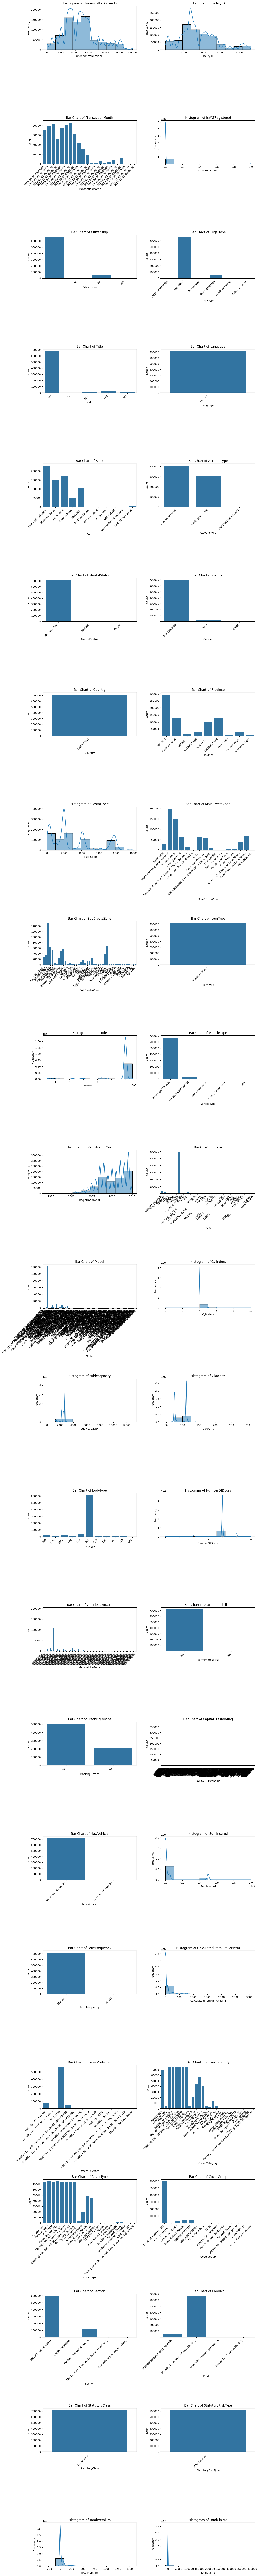

In [13]:
univariate_analysis_with_subplots(df)

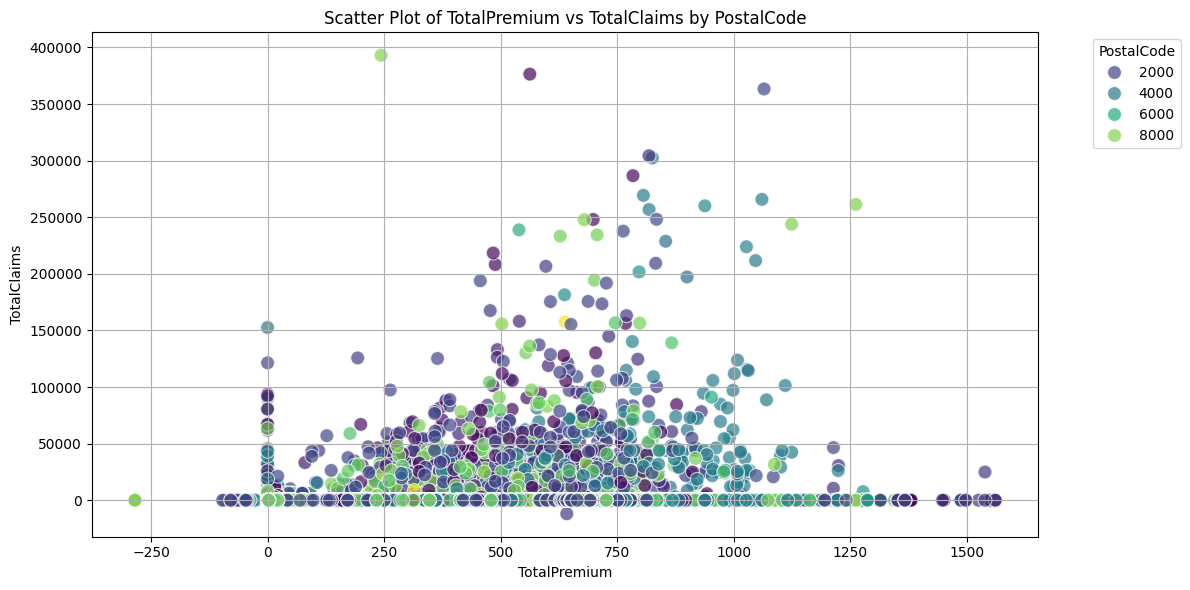

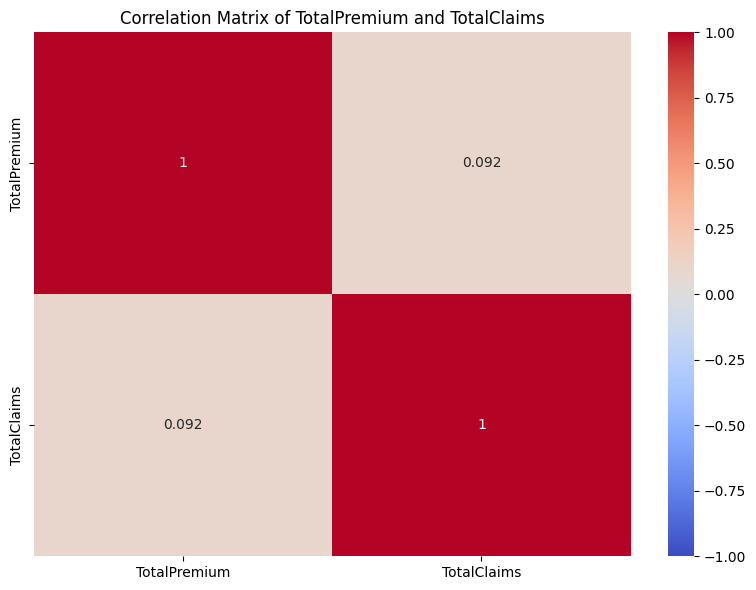

In [14]:
# Call the function to perform bivariate and multivariate analysis
bivariate_multivariate_analysis(df, 'PostalCode')

### Numerical comparison

In [15]:
create_crosstab(df, 'Gender', 'MaritalStatus')

MaritalStatus,Married,Not specified,Single
Gender,,,
Female,112,2577,0
Male,0,17735,1232
Not specified,653,693899,0


## Categorical Features Comparison:

In [16]:
create_crosstab(df, 'MaritalStatus', 'IsVATRegistered')

IsVATRegistered,False,True
MaritalStatus,,
Married,765,0
Not specified,710608,3603
Single,1232,0


In [17]:
create_crosstab(df,'Gender', 'VehicleType')

VehicleType,Bus,Heavy Commercial,Light Commercial,Medium Commercial,Passenger Vehicle
Gender,,,,,
Female,0,0,0,0,2689
Male,0,0,0,587,18380
Not specified,341,5079,3025,38311,647796


In [18]:
create_crosstab(df,'Country', 'Province')

Province,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape
Country,,,,,,,,,
South Africa,24785,4756,294076,124692,16658,26436,96071,5551,123183


In [19]:
create_crosstab(df,'CoverCategory', 'CoverType')

CoverType,Accidental Death,Asset Value Preserver,Baggage/Luggage,Basic Excess Waiver,Cash Takings,Cleaning and Removal of Accident Debris,Credit Protection,Deposit Cover,Emergency Charges,Factory Fitted Sound and Other Electronic Equipment,...,Keys and Alarms,Own Damage,Passenger Liability,Roadside Assistance,Signage and Vehicle Wraps,Standalone passenger liability,Third Party,Third Party Only,Trailer,Windscreen
CoverCategory,,,,,,,,,,,,,,,,,,,,,
Accidental Death,19915,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asset Value Preserver,0,541,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baggage/Luggage,0,0,45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basic Excess Waiver,0,0,0,44436,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basic Excess Waiver (2015),0,0,0,3622,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cash Takings,0,0,0,0,89,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cleaning and Removal of Accident Debris,0,0,0,0,0,74266,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Credit Protection,0,0,0,0,0,0,4338,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Deposit Cover,0,0,0,0,0,0,0,762,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Mixed Categorical and Numerical Comparisons

In [20]:
create_crosstab(df, 'VehicleType', 'TotalPremium')

TotalPremium,-284.497807,-96.491228,-92.105263,-80.409357,-78.947368,-68.421053,-67.669173,-64.619883,-63.909774,-60.526316,...,1447.721930,1450.738246,1486.679035,1487.659123,1497.643333,1498.914096,1524.835658,1538.957719,1550.600789,1561.080439
VehicleType,,,,,,,,,,,,,,,,,,,,,
Bus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Heavy Commercial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Light Commercial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Medium Commercial,0,0,0,0,0,0,0,0,0,0,...,0,4,10,0,0,0,0,0,0,0
Passenger Vehicle,12,1,1,1,2,1,1,1,1,1,...,1,0,0,1,2,1,1,2,2,7


In [21]:
create_crosstab(df,'CoverType', 'SumInsured')

SumInsured,0.01,1000.00,1500.00,3500.00,5000.00,7000.00,7500.00,10000.00,16300.00,17900.00,...,654000.00,656500.00,662600.00,670000.00,675000.00,689608.00,715712.00,1500000.00,5000000.00,10000000.00
CoverType,,,,,,,,,,,,,,,,,,,,,
Accidental Death,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asset Value Preserver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baggage/Luggage,0,0,0,0,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basic Excess Waiver,0,0,0,0,0,0,48058,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cash Takings,0,10,79,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cleaning and Removal of Accident Debris,0,0,0,0,0,0,74266,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Credit Protection,0,0,0,0,0,0,0,0,0,0,...,3,0,0,12,0,0,0,0,0,0
Deposit Cover,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Emergency Charges,0,0,0,0,0,0,74266,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# sns.pairplot(df)
# plt.show()

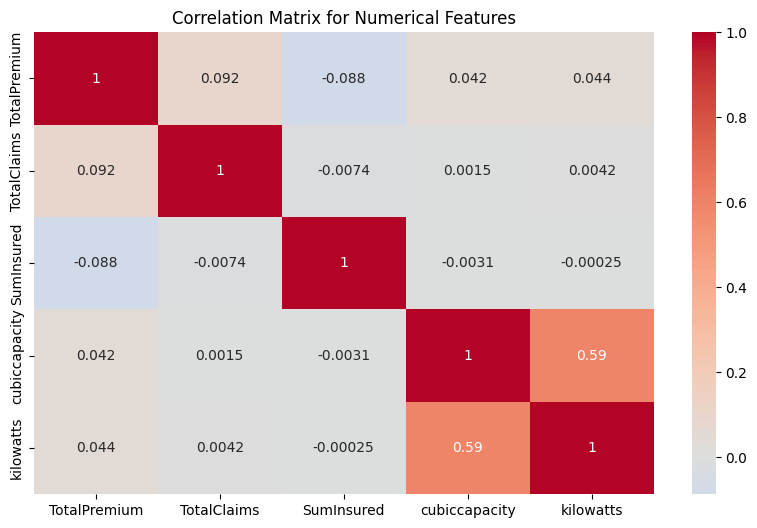

In [23]:
numerical_features = ['TotalPremium', 'TotalClaims', 'SumInsured', 'cubiccapacity', 'kilowatts']
visualize_correlation_matrix(df, numerical_features)

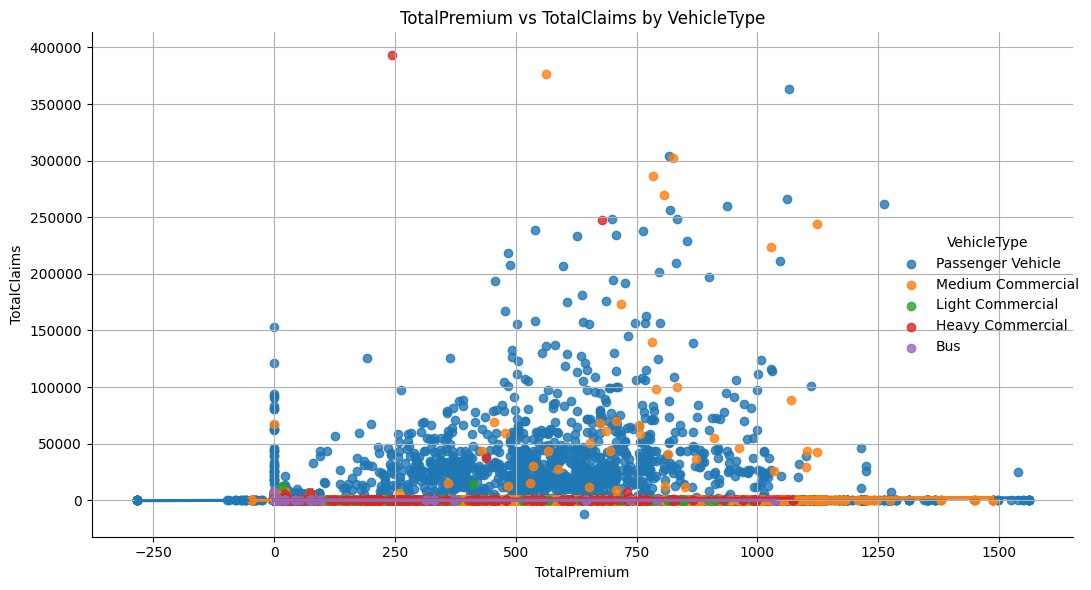

In [24]:
plot_premium_vs_claims(df)

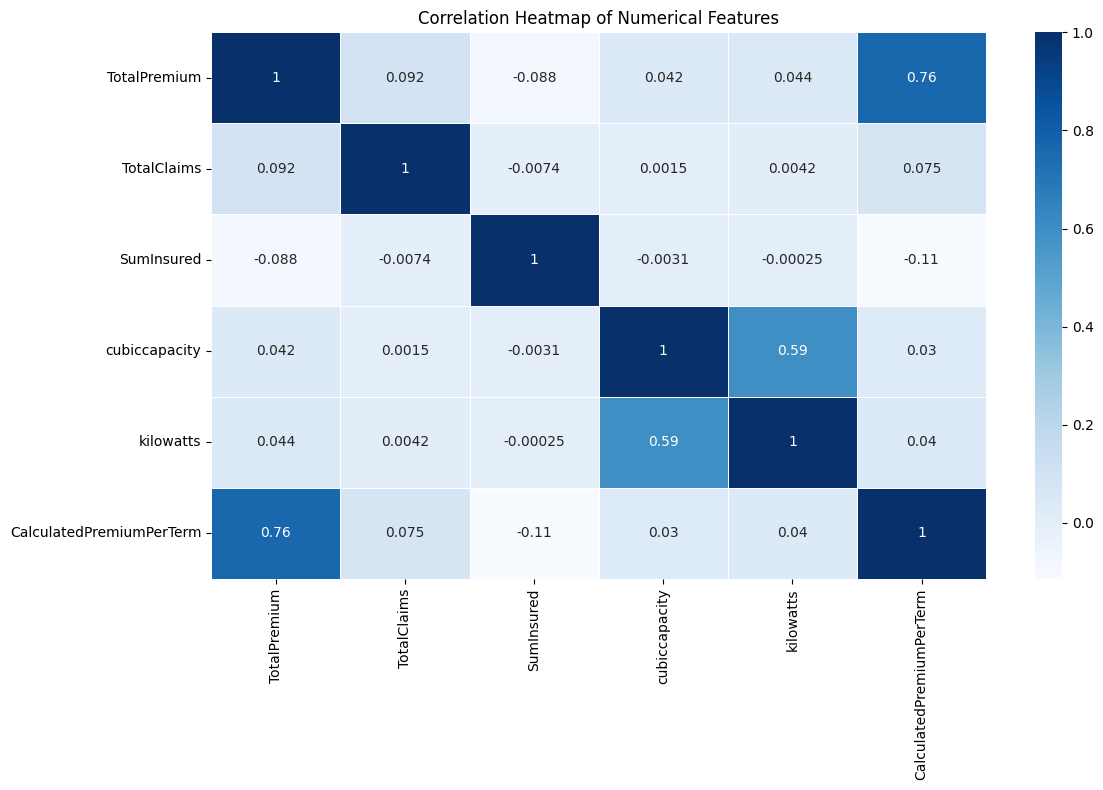

In [25]:
numerical_features = ['TotalPremium', 'TotalClaims', 'SumInsured', 'cubiccapacity', 'kilowatts', 'CalculatedPremiumPerTerm']
plot_correlation_heatmap(df, numerical_features)

c:\Users\ephre\Documents\AlphaCare-Insurance-Solutions\scripts\EDA.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_col, y=y_col, data=df, palette="Set3")


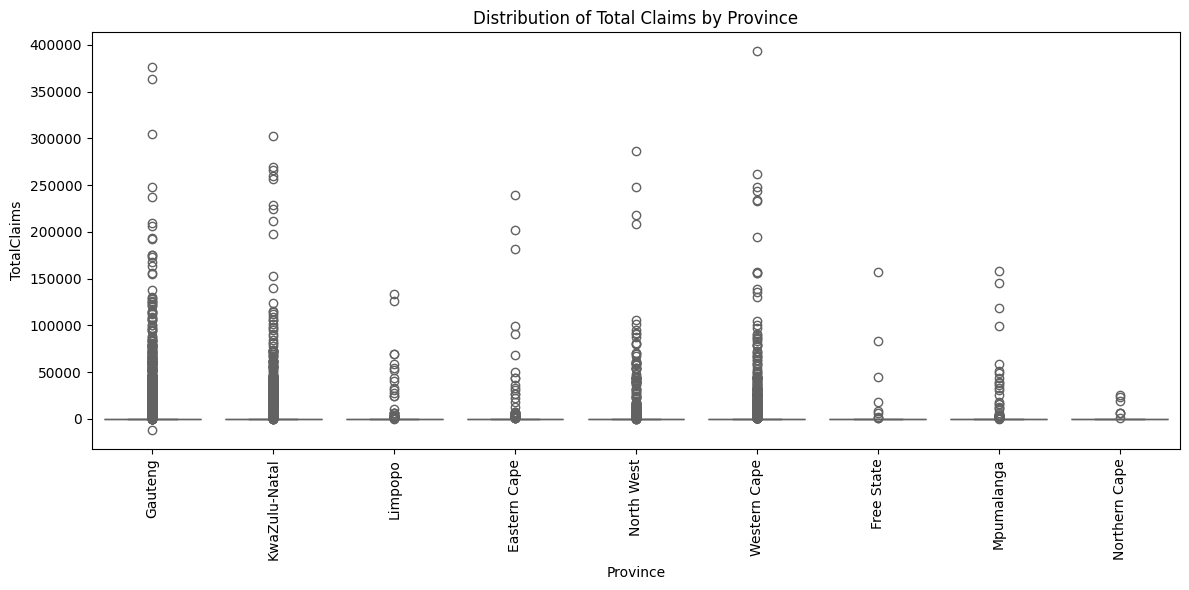

In [26]:
plot_boxplot(df, 'Province', 'TotalClaims', 'Distribution of Total Claims by Province')

In [29]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
